In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics

In [79]:
data = pd.read_csv("data/BankNote_Authentication.csv")
# prikaz prvih 10 redova
data.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [81]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [82]:
data['class'].unique()

array([0, 1])

In [83]:
print("Broj 0")
print(len(data[data["class"] == 0]))

print("Broj 1")
print(len(data[data["class"] == 1]))

Broj 0
762
Broj 1
610


In [84]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Velicina trening skupa: {len(df_train)}")
print(f"Velicina testnog skupa: {len(df_test)}")

Velicina trening skupa: 1097
Velicina testnog skupa: 275


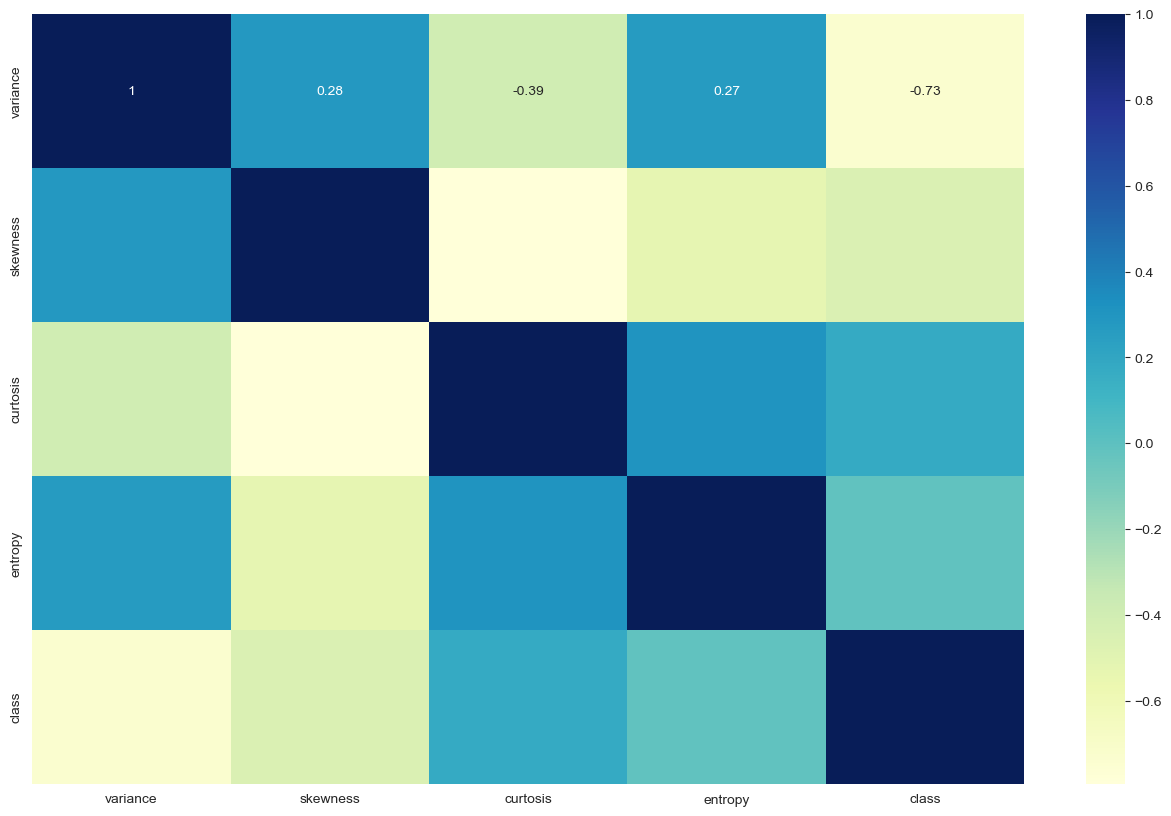

In [85]:
# Grafik prikazuje inearnu korelaciju svake dvije kolone

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [86]:
def df_to_matrix(df):
    return df.iloc[:,:].values

In [87]:
y_train = np.array(df_train.pop('class'))
X_train = df_to_matrix(df_train)

y_test = np.array(df_test.pop('class'))
X_test = df_to_matrix(df_test)

In [88]:
X_train

array([[-1.3885  , 12.5026  ,  0.69118 , -7.5487  ],
       [ 2.7744  ,  6.8576  , -1.0671  ,  0.075416],
       [-4.2887  , -7.8633  , 11.8387  , -1.8978  ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [89]:
y_train[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [90]:
X_train.shape

(1097, 4)

In [91]:
y_train.shape

(1097,)

In [92]:
X_test

array([[ 1.5691  ,  6.3465  , -0.1828  , -2.4099  ],
       [-0.27802 ,  8.1881  , -3.1338  , -2.5276  ],
       [ 0.051979,  7.0521  , -2.0541  , -3.1508  ],
       ...,
       [ 3.4626  , -4.449   ,  3.5427  ,  0.15429 ],
       [-0.278   ,  8.1881  , -3.1338  , -2.5276  ],
       [ 2.7831  , 10.9796  , -3.557   , -4.4039  ]])

In [93]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [94]:
X_test.shape

(275, 4)

In [95]:
y_test.shape

(275,)

# Implementacija modela logističke regresije

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

class LogistickaRegresija():
    def __init__(self, learning_rate=0.01):
        self.losses = []
        self.train_accuracies = []
        self.learning_rate = learning_rate

    def train(self, x, y, epochs=100):

        # broj podataka, broj featuresa
        self.n, self.d = x.shape
        # inicijalizacija tezina
        self.W = np.zeros(self.d)
        self.b = 0

        for i in range(epochs):
            pred = self.predict(x, to_logits=False)

            loss = self.compute_loss(y, pred)
            dW, dB = self.compute_gradients(x, y, pred)
            self.update_model_parameters(dW, dB)

            y_pred = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, y_pred))
            self.losses.append(loss)
            print(f"Train Loss: {round(loss, 3)} | Train Accuracy: {self.train_accuracies[-1]}")

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        dW = - ((x.T).dot(y_true - y_pred)) / self.n
        db = - np.sum(y_true - y_pred) / self.n

        return dW, db

    def update_model_parameters(self, dW, dB):
        self.W = self.W - self.learning_rate * dW
        self.bias = self.b - self.learning_rate * dB

    def predict(self, X, to_logits=True):
        x_dot_weights = X.dot(self.W) + self.b
        probabilities = np.array([self.sigmoid(proba) for proba in x_dot_weights ])
        if to_logits:
            return [1 if p > 0.5 else 0 for p in probabilities]
        else:
            return probabilities

    def sigmoid(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

In [97]:
# Skaliranja feature-sa (standardizacija)
from sklearn.preprocessing import StandardScaler

train_std_scaler = StandardScaler()

X_train_std = train_std_scaler.fit_transform(X_train)
X_test_std = train_std_scaler.transform(X_test)

In [98]:
model = LogistickaRegresija( learning_rate=1e-1)
model.train(X_train_std, y_train, epochs=100)
y_train_pred = model.predict(X_train_std)
stats.describe(y_train_pred)

Train Loss: 0.693 | Train Accuracy: 0.5597082953509571
Train Loss: 0.674 | Train Accuracy: 0.8477666362807658
Train Loss: 0.657 | Train Accuracy: 0.8495897903372835
Train Loss: 0.641 | Train Accuracy: 0.8495897903372835
Train Loss: 0.626 | Train Accuracy: 0.8514129443938013
Train Loss: 0.612 | Train Accuracy: 0.854147675478578
Train Loss: 0.6 | Train Accuracy: 0.854147675478578
Train Loss: 0.587 | Train Accuracy: 0.8550592525068368
Train Loss: 0.576 | Train Accuracy: 0.8577939835916135
Train Loss: 0.565 | Train Accuracy: 0.8596171376481313
Train Loss: 0.555 | Train Accuracy: 0.8577939835916135
Train Loss: 0.546 | Train Accuracy: 0.8587055606198724
Train Loss: 0.537 | Train Accuracy: 0.8577939835916135
Train Loss: 0.529 | Train Accuracy: 0.8596171376481313
Train Loss: 0.521 | Train Accuracy: 0.8623518687329079
Train Loss: 0.513 | Train Accuracy: 0.8632634457611669
Train Loss: 0.506 | Train Accuracy: 0.8641750227894257
Train Loss: 0.499 | Train Accuracy: 0.8659981768459435
Train Loss: 0.

DescribeResult(nobs=1097, minmax=(0, 1), mean=0.47037374658158615, variance=0.24934958646341382, skewness=0.1187135902774598, kurtosis=-1.9859070834834354)

In [99]:
y_test_pred = model.predict(X_test_std)
accuracy_score(y_test, y_test_pred)

0.9163636363636364

In [100]:
def print_metrics(y_test, y_test_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred),' - Classification Rate')
    print("Precision:",metrics.precision_score(y_test, y_test_pred),' - Precision - What proportion of positive identifications was actually correct? ')
    print("Recall:",metrics.recall_score(y_test, y_test_pred),' - Recall - What proportion of actual positives was identified correctly?')

In [101]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[137,  11],
       [ 12, 115]])

Text(0.5, 427.9555555555555, 'Predicted label')

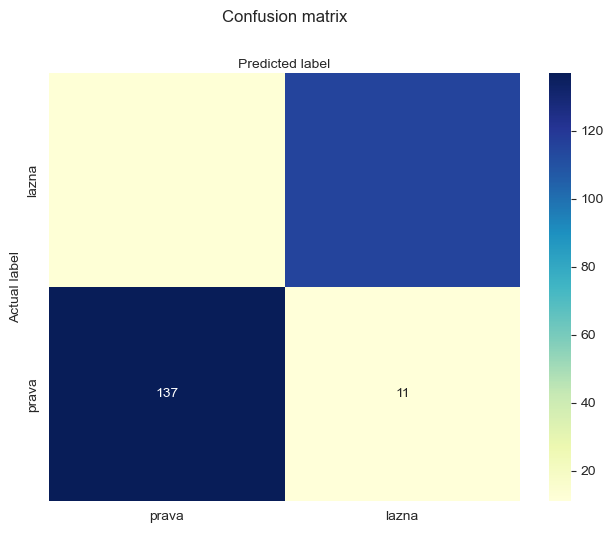

In [102]:
# Plot the Confusion Matrix as a HeatMap
class_names=["prava", "lazna"] # Name  of classes
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
ax.invert_yaxis()
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
print_metrics(y_test, y_test_pred)

Accuracy: 0.9163636363636364  - Classification Rate
Precision: 0.9126984126984127  - Precision - What proportion of positive identifications was actually correct? 
Recall: 0.905511811023622  - Recall - What proportion of actual positives was identified correctly?


# Korištenje Logisticke regresije iz sklearn biblioteke

In [104]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.99179580674567

In [105]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.850909090909091

In [106]:
accuracy_score(y_test, y_test_pred)

0.850909090909091

In [107]:
print_metrics(y_test, y_test_pred)

Accuracy: 0.850909090909091  - Classification Rate
Precision: 0.9777777777777777  - Precision - What proportion of positive identifications was actually correct? 
Recall: 0.6929133858267716  - Recall - What proportion of actual positives was identified correctly?


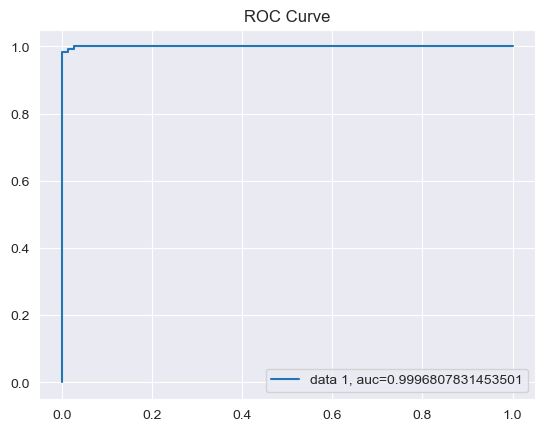

The AUC Score provides an aggregate measure of performance across all possible classification thresholds
AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.


In [108]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.show()
print('The AUC Score provides an aggregate measure of performance across all possible classification thresholds')
print('AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.')


In [109]:
print(metrics.classification_report(y_test, y_test_pred)) # Displays a comprehensive Report of the Logistic Regression Model

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       148
           1       0.98      0.69      0.81       127

    accuracy                           0.85       275
   macro avg       0.88      0.84      0.84       275
weighted avg       0.88      0.85      0.85       275


# Više klasa: Multinomijalna logistička regresija

In [110]:
data = pd.read_csv("../data/IRIS.csv")
# prikaz prvih 10 redova
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '../data/IRIS.csv'

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [112]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [113]:
classes = data['species'].unique()

KeyError: 'species'

In [ ]:
classes_dict = {class_name: i for i, class_name in enumerate(classes)}
classes_dict

In [ ]:
def species_map(x):
    return x.map(classes_dict)

# Mapiranje podataka iz dataframe-a
data[['species']] = data[['species']].apply(species_map)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print(f"Velicina trening skupa: {len(df_train)}")
print(f"Velicina testnog skupa: {len(df_test)}")

In [ ]:
# Grafik prikazuje inearnu korelaciju svake dvije kolone

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
def df_to_matrix(df):
    return df.iloc[:,:].values

In [ ]:
y_train = np.array(df_train.pop('species'))
X_train = df_to_matrix(df_train)

y_test = np.array(df_test.pop('species'))
X_test = df_to_matrix(df_test)

In [ ]:
X_train

In [ ]:
y_train[:10]

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test

In [ ]:
y_test[:10]

In [ ]:
X_test.shape

In [ ]:
y_test.shape

# Implementacija modela multinomijalne logističke regresije

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

class MultinomijalnaLogistickaRegresija():
    def __init__(self, num_classes, learning_rate=0.01):
        self.losses = []
        self.train_accuracies = []
        self.num_classes = num_classes
        self.learning_rate = learning_rate

    def train(self, x, y, epochs=100):

        # broj podataka, broj featuresa
        self.m, self.n = x.shape
        # inicijalizacija tezina
        self.W = np.zeros((self.n, self.num_classes))
        self.b = np.zeros(self.num_classes)

        for i in range(epochs):
            probabilities, y_pred = self.predict(x)

            loss = self.compute_loss(y, probabilities)
            dW, dB = self.compute_gradients(x, y, probabilities)
            self.update_model_parameters(dW, dB)

            self.train_accuracies.append(accuracy_score(y, y_pred))
            self.losses.append(loss.mean())
            print(f"Train Loss: {self.losses[-1]} | Train Accuracy: {self.train_accuracies[-1]}")

    def compute_loss(self, y_true, probabilities):
        # cross entropy
        CELoss = -np.mean(np.log([proba[i] for proba, i in zip(probabilities, y_true)]))
        return CELoss

    def compute_gradients(self, x, y_true, probabilities):
        # derivative of cross entropy
        probabilities[np.arange(self.m), y_true] -= 1 # Substract 1 from the scores of the correct outcome
        dW = x.T.dot(probabilities) / self.m # gradient of loss w.r.t. weights
        db = np.sum(probabilities, axis = 0) / self.m # gradient of loss w.r.t. biases
        return dW, db

    def update_model_parameters(self, dW, dB):
        self.W = self.W - self.learning_rate * dW
        self.bias = self.b - self.learning_rate * dB

    def predict(self, X):
        x_dot_weights = X.dot(self.W) + self.b
        probabilities = np.array([self.softmax(proba) for proba in x_dot_weights ])
        predictions = np.array([np.argmax(i) for i in probabilities])
        return probabilities, predictions

    def softmax(self, x):
        z = np.exp(x)
        z /= np.sum(z)
        return z

In [ ]:
model = MultinomijalnaLogistickaRegresija(num_classes=3, learning_rate=7e-2 )
model.train(X_train, y_train, epochs=100)
_, y_train_pred = model.predict(X_train)
accuracy_score(y_train, y_train_pred)

In [ ]:
plt.plot(model.losses)
plt.show()

In [ ]:
_, y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

In [ ]:
print_metrics(y_test, y_test_pred)

# Korištenje Multinomijalne logisticke regresije iz sklearn biblioteke

In [ ]:
mclf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_train_pred = mclf.predict(X_train)
accuracy_score(y_train, y_train_pred)

In [ ]:
y_train_pred = mclf.predict(X_train)
accuracy_score(y_train, y_train_pred)

In [ ]:
y_test_pred = mclf.predict(X_test)
accuracy_score(y_test, y_test_pred)